# Temperature Forecast Project using ML

# Data Description

Problem Statement:
Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

# Importing required Libariries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_columns', 1500)
pd.set_option('display.width', 1000)

In [9]:
pd.set_option('display.max_rows',None)

# Importing Dataset

In [10]:
df=pd.read_csv('temperature.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [11]:
df.info()                                        # Check the information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [12]:
df.shape                        # Check the shape of dataset

(7752, 25)

We have 7752 rows and 25 columns including the target column.

In [13]:
df.columns                      # Check the number of columns in dataset

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'], dtype='object')

In [14]:
df['Next_Tmax'].mean()  #Check the mean value for maximum Temperature

30.274886731391593

In [15]:
df['Next_Tmin'].mean()     #Check the mean value for minimum Temperature

22.93222006472492

# Exploratory Data Analysis 

# Graphical Representation

Text(0.5, 1.0, 'Maximum Temperature Prediction')

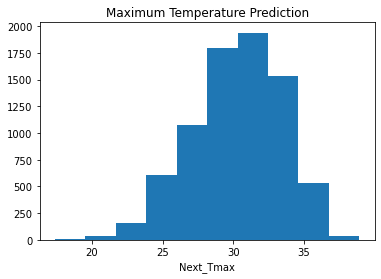

In [16]:
# Histogram Display distribution of data across Maximum Temperature Prediction.
plt.hist(df['Next_Tmax'])
plt.xlabel('Next_Tmax')
plt.title('Maximum Temperature Prediction')

<AxesSubplot:title={'center':'Next day maximum Temperature'}, xlabel='Next_Tmax', ylabel='Density'>

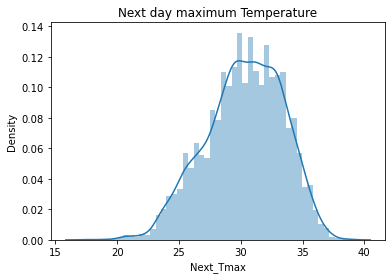

In [17]:
# Distplot Display distribution of data across Next day maximum Temperature.
plt.title('Next day maximum Temperature')
sns.distplot(df['Next_Tmax'],kde=True)

The distplot clears that next day maximum temparature distribution is lies between 22 to 37.

Text(0.5, 1.0, 'Minimum Temperature Prediction')

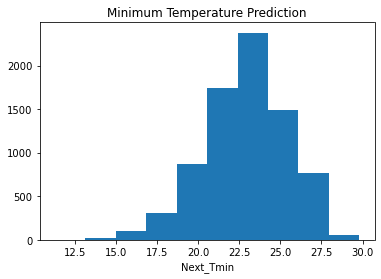

In [18]:
# Histogram Display distribution of data across Minimum Temperature Prediction.
plt.hist(df['Next_Tmin'])
plt.xlabel('Next_Tmin')
plt.title('Minimum Temperature Prediction')

<AxesSubplot:title={'center':'Next day minimum Temperature'}, xlabel='Next_Tmin', ylabel='Density'>

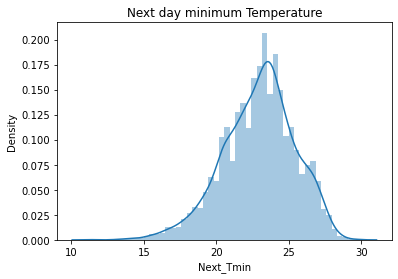

In [19]:
# Distplot Display distribution of data across Next day minimum Temperature.
plt.title('Next day minimum Temperature')
sns.distplot(df['Next_Tmin'],kde=True)

The distplot clears that next day minimum temparature distribution is lies between 15 to 28.

Text(0, 0.5, 'Next_Tmax')

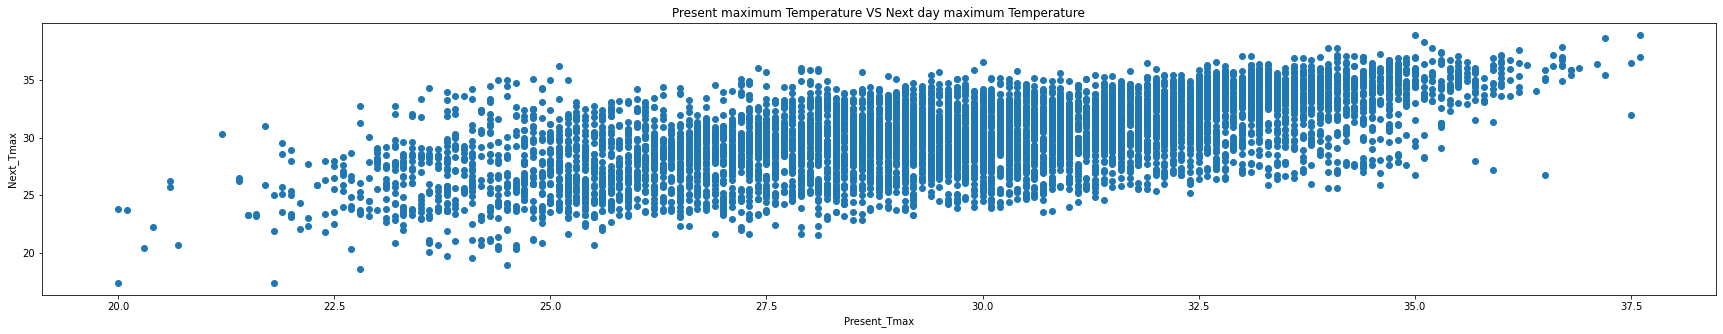

In [20]:
# Scatterplot Display distribution of data across Present maximum Temperature VS Next day maximum Temperature.
plt.figure(figsize=(30,5))
plt.title('Present maximum Temperature VS Next day maximum Temperature')
plt.scatter(df['Present_Tmax'], df['Next_Tmax'])
plt.xlabel('Present_Tmax')
plt.ylabel('Next_Tmax')

Text(0, 0.5, 'Next_Tmin')

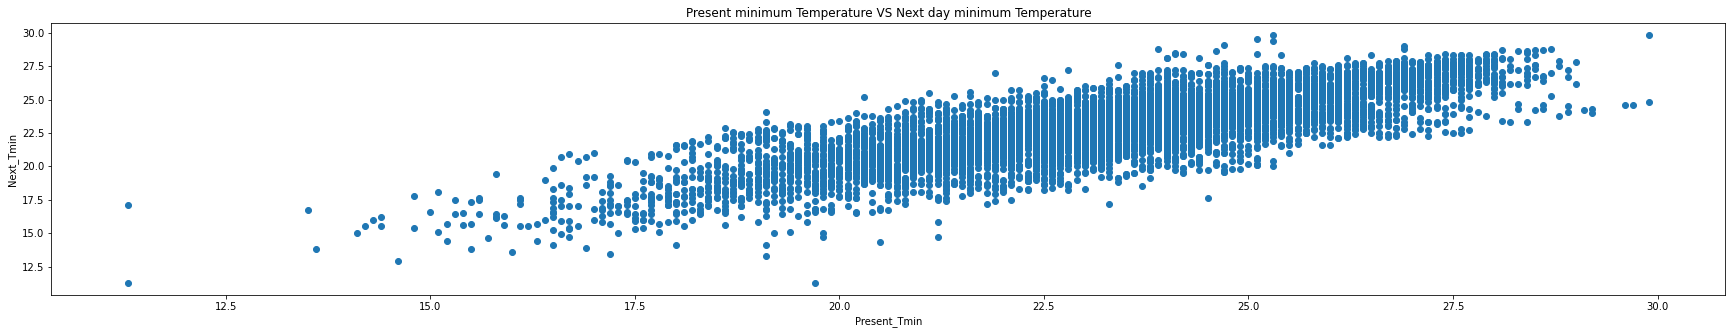

In [21]:
# Scatterplot Display distribution of data across Present minimum Temperature VS Next day minimum Temperature.
plt.figure(figsize=(30,5))
plt.title('Present minimum Temperature VS Next day minimum Temperature')
plt.scatter(df['Present_Tmin'], df['Next_Tmin'])
plt.xlabel('Present_Tmin')
plt.ylabel('Next_Tmin')

<AxesSubplot:title={'center':'Next day maximum Temperature'}, xlabel='Next_Tmax'>

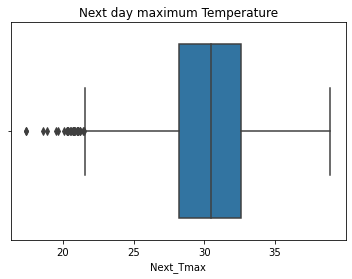

In [22]:
# Boxplot Display distribution of data across Next day maximum Temperature.
plt.title('Next day maximum Temperature')
sns.boxplot(df['Next_Tmax'])

As we can see that there are some points which are seeems like outliers but we cannot remove them because these can be next day maximum temperature.

<AxesSubplot:title={'center':'Next day minimum Temperature'}, xlabel='Next_Tmin'>

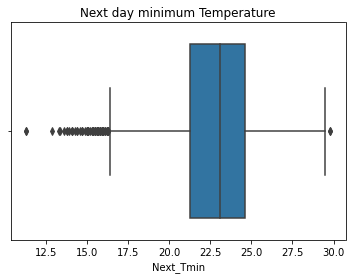

In [23]:
# Boxplot Display distribution of data across Next day minimum Temperature.
plt.title('Next day minimum Temperature')
sns.boxplot(df['Next_Tmin'])

As we can see that there are some points which are seeems like outliers but we cannot remove them because these can be next day minimum temperature.

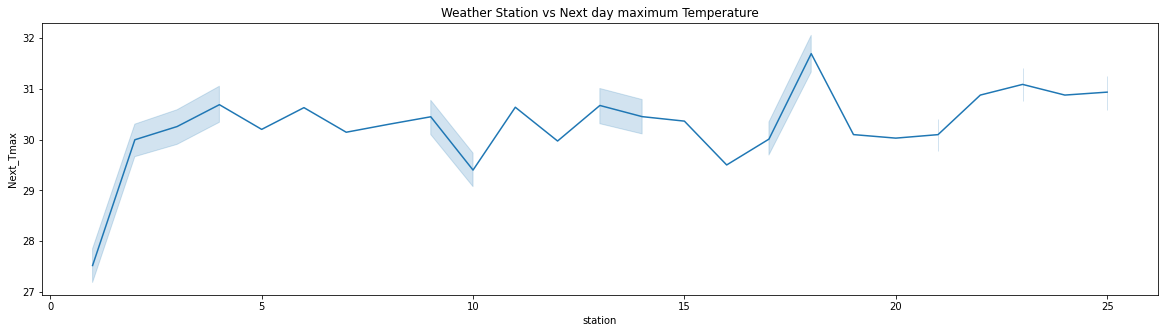

In [24]:
# Lineplot Display distribution of data across Weather Station vs Next day maximum Temperature.
plt.figure(figsize=(20,5))
plt.title('Weather Station vs Next day maximum Temperature')
sns.lineplot(x='station',y='Next_Tmax',data=df)
plt.show()

The line plot clears that next day maximum temparature is high & low at station 18 & 10 respectively.

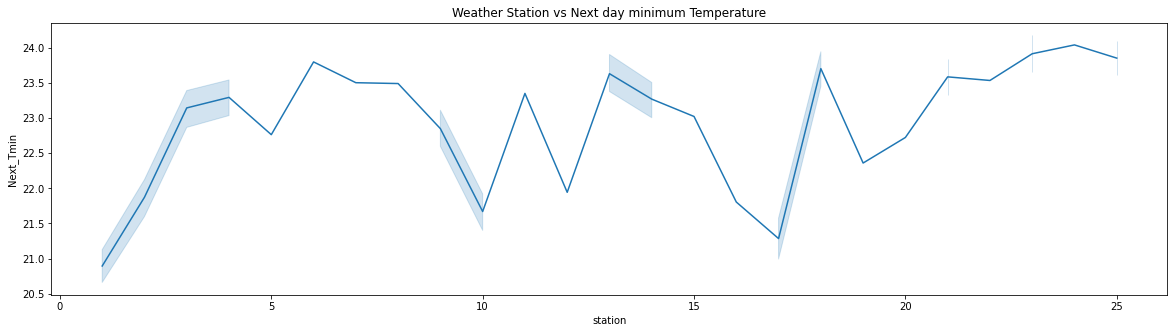

In [25]:
# Lineplot Display distribution of data across Weather Station vs Next day minimum Temperature.
plt.figure(figsize=(20,5))
plt.title('Weather Station vs Next day minimum Temperature')
sns.lineplot(x='station',y='Next_Tmin',data=df)
plt.show()

The line plot clears that next day minimum temparature is high & low at station 18 & 17 respectively.

Text(0, 0.5, 'Next_Tmax')

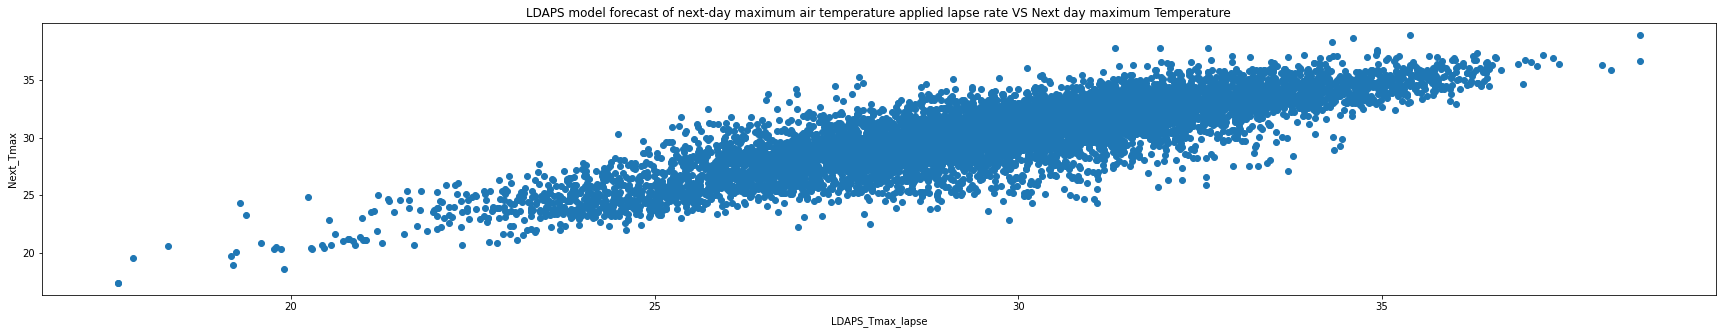

In [26]:
# Scatterplot Display distribution of data across LDAPS model forecast of next-day maximum air temperature applied lapse rate VS Next day maximum Temperature.
plt.figure(figsize=(30,5))
plt.title('LDAPS model forecast of next-day maximum air temperature applied lapse rate VS Next day maximum Temperature')
plt.scatter(df['LDAPS_Tmax_lapse'], df['Next_Tmax'])
plt.xlabel('LDAPS_Tmax_lapse')
plt.ylabel('Next_Tmax')

Text(0, 0.5, 'Next_Tmin')

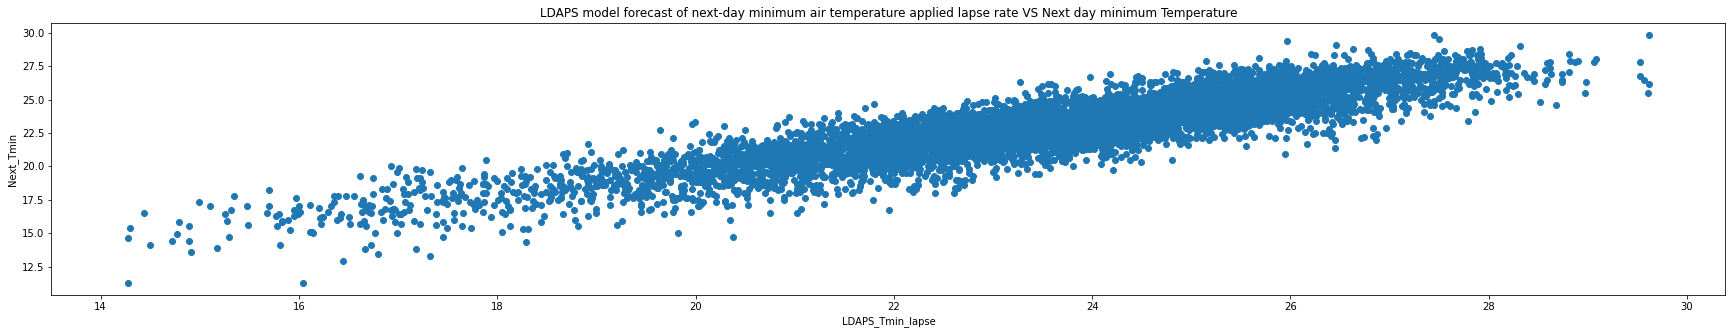

In [27]:
# Scatterplot Display distribution of data across LDAPS model forecast of next-day minimum air temperature applied lapse rate VS Next day minimum Temperature.
plt.figure(figsize=(30,5))
plt.title('LDAPS model forecast of next-day minimum air temperature applied lapse rate VS Next day minimum Temperature')
plt.scatter(df['LDAPS_Tmin_lapse'], df['Next_Tmin'])
plt.xlabel('LDAPS_Tmin_lapse')
plt.ylabel('Next_Tmin')

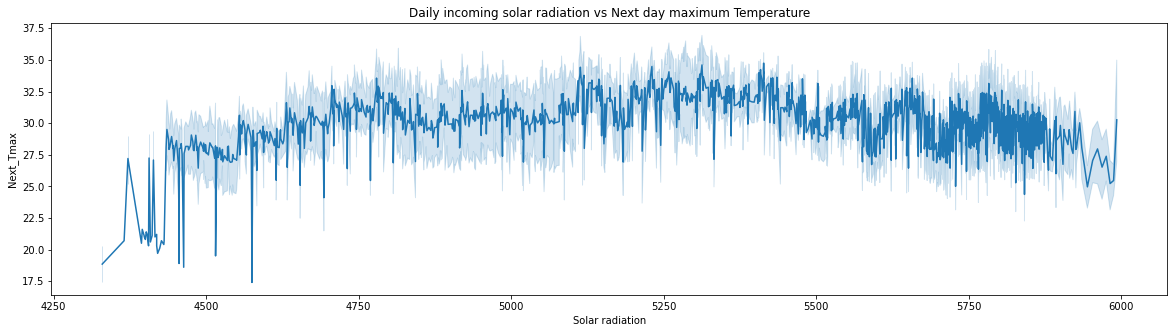

In [28]:
# Lineplot Display distribution of data across Daily incoming solar radiation vs Next day maximum Temperature.
plt.figure(figsize=(20,5))
plt.title('Daily incoming solar radiation vs Next day maximum Temperature')
sns.lineplot(x='Solar radiation',y='Next_Tmax',data=df)
plt.show()

According to solar radiation, the next day maximum temparature is frequently increases.

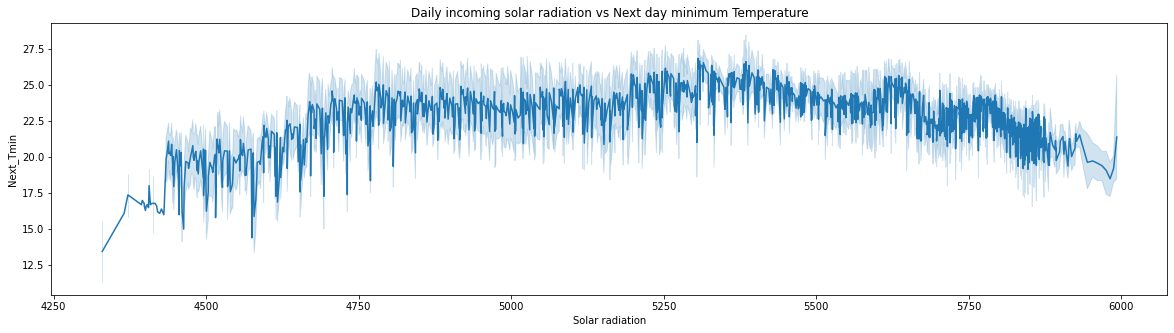

In [29]:
# Lineplot Display distribution of data across Daily incoming solar radiation vs Next day minimum Temperature.
plt.figure(figsize=(20,5))
plt.title('Daily incoming solar radiation vs Next day minimum Temperature')
sns.lineplot(x='Solar radiation',y='Next_Tmin',data=df)
plt.show()

According to solar radiation, the next day minimum temparature is frequently increases.

 Graphical Representation Conclusion

The columns included in data has plays vital role for target variables.so we are not going to drop any of the columns.

# Preprocessing

In [30]:
df.describe()                                #statistics summary for numerical columns

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,0.250362,0.254348,1.945768,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,0.101388,0.081532,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,0.496703,0.499489,0.052525,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


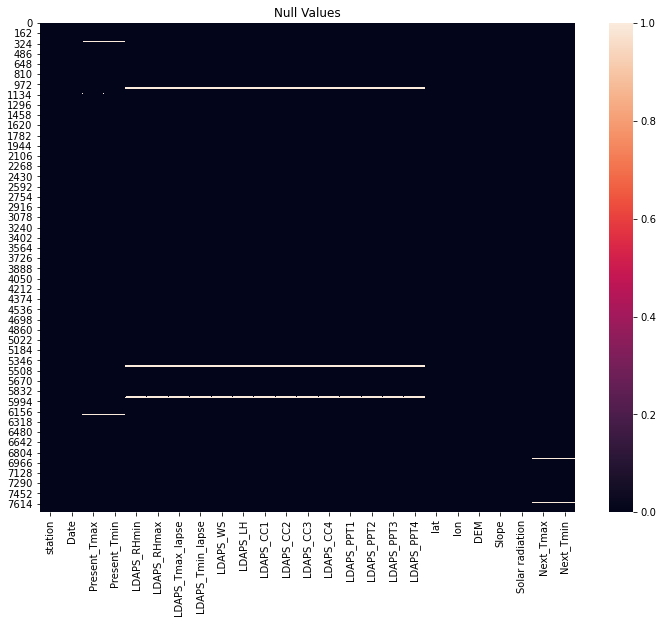

In [31]:
#Heatmap Display distribution of data across all level of category
plt.figure(figsize=(12,9))
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [32]:
#Check the null values in dataset
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [33]:
#filling the missing values for numerical terms by mean
df['station']=df['station'].fillna(df['station'].mean())
df['Present_Tmax']=df['Present_Tmax'].fillna(df['Present_Tmax'].mean())
df['Present_Tmin']=df['Present_Tmin'].fillna(df['Present_Tmin'].mean())
df['LDAPS_RHmin']=df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean())
df['LDAPS_RHmax']=df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mean())
df['LDAPS_Tmax_lapse']=df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean())
df['LDAPS_Tmin_lapse']=df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mean())
df['LDAPS_WS']=df['LDAPS_WS'].fillna(df['LDAPS_WS'].mean())
df['LDAPS_LH']=df['LDAPS_LH'].fillna(df['LDAPS_LH'].mean())
df['LDAPS_CC1']=df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mean())
df['LDAPS_CC2']=df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mean())
df['LDAPS_CC3']=df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mean())
df['LDAPS_CC4']=df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].mean())
df['LDAPS_PPT1']=df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mean())
df['LDAPS_PPT2']=df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mean())
df['LDAPS_PPT3']=df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mean())
df['LDAPS_PPT4']=df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mean())
df['Next_Tmax']=df['Next_Tmax'].fillna(df['Next_Tmax'].mean())
df['Next_Tmin']=df['Next_Tmin'].fillna(df['Next_Tmin'].mean())

In [34]:
df.isnull().sum()                           

station             0
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [35]:
import datetime as ddt
df['Date']=pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(ddt.datetime.toordinal)

In [36]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [37]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


Converting all Object attributes into Numerical attributes by using LabelEncoder

In [38]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=l.fit_transform(df[i].values)

In [39]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [40]:
df.describe()                                      #statistics summary for numerical columns          

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,735608.827012,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.210637,11829.341785,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,0.261185,0.256810,0.249148,0.253114,1.936331,1.754258,1.156174,1.200364,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276
min,1.000000,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,735427.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,0.142328,0.103100,0.082741,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,735807.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,0.315667,0.265264,0.232354,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,736199.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,0.554963,0.494007,0.497230,0.067593,0.024276,0.009697,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,736671.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


<AxesSubplot:>

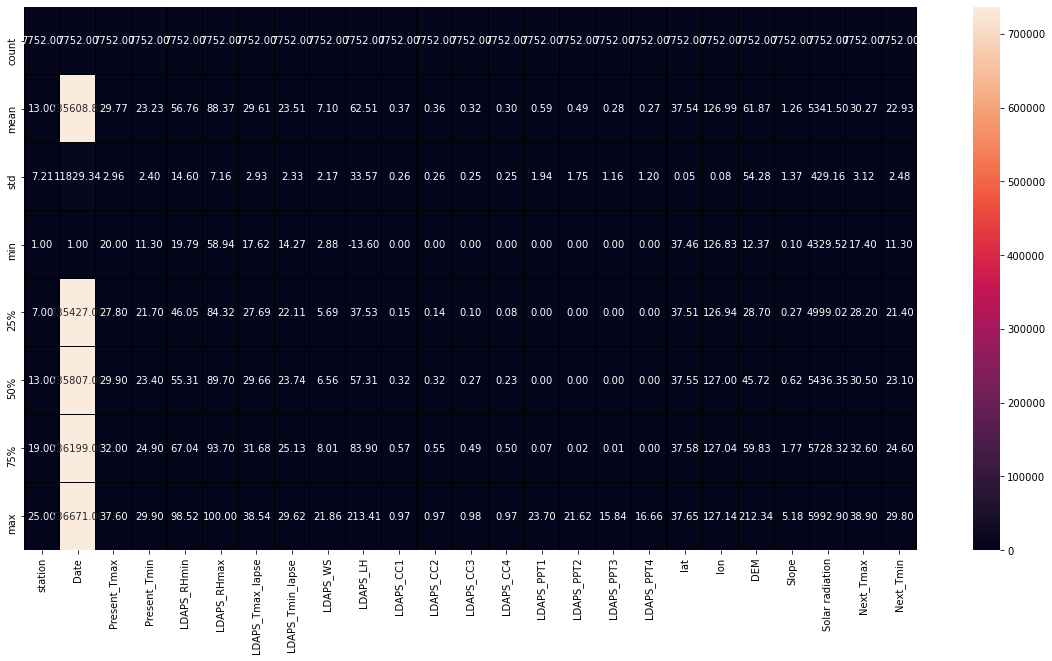

In [41]:
#Heatmap Display distribution of data across all level of category
plt.figure(figsize=(20,10))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

# Correlation Matrix

In [42]:
dfcor=df.corr()                                     # Check Correlation in dataset
dfcor

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.000000,0.112655,0.131646,-0.066733,-0.166984,0.069107,0.104758,0.005277,-0.133357,0.006919,0.003396,0.000694,0.006126,-0.002709,-0.008250,-0.012461,-0.010401,-0.237502,-0.118704,-0.255830,-0.090061,-0.019001,0.107983,0.128293
Date,0.000000,1.000000,0.007766,0.019074,-0.003083,0.013541,0.008840,0.010287,-0.044282,-0.015528,-0.010413,-0.010414,-0.006590,-0.007504,-0.097386,-0.096594,-0.103827,-0.106507,-0.001874,0.002202,-0.014928,-0.016177,0.004326,0.013306,0.016178
Present_Tmax,0.112655,0.007766,1.000000,0.618760,-0.204571,-0.301787,0.570129,0.623496,-0.121820,0.135463,-0.311805,-0.213791,-0.144018,-0.140729,-0.109006,-0.099449,-0.120367,-0.099607,-0.052615,0.009020,-0.187121,-0.105809,-0.025439,0.610348,0.622741
Present_Tmin,0.131646,0.019074,0.618760,1.000000,0.123143,-0.015140,0.464151,0.762993,-0.034675,-0.009258,0.084447,0.090263,-0.002772,-0.044335,0.112845,0.068176,-0.046126,-0.062965,-0.078475,-0.043461,-0.250275,-0.146339,0.053578,0.471806,0.796670
LDAPS_RHmin,-0.066733,-0.003083,-0.204571,0.123143,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,0.745443,0.689679,0.514075,0.262665,0.390967,0.240642,0.168595,0.087099,-0.076237,0.102115,0.123744,0.244080,-0.437898,0.095019
LDAPS_RHmax,-0.166984,0.013541,-0.301787,-0.015140,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,0.391330,0.226957,0.130619,0.268449,0.229050,0.134607,0.117853,0.195798,0.025667,0.177168,0.219599,0.149261,-0.283738,-0.071997
LDAPS_Tmax_lapse,0.069107,0.008840,0.570129,0.464151,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,-0.523619,-0.541327,-0.429539,-0.111065,-0.242122,-0.188115,-0.160273,-0.042093,0.090666,-0.178895,-0.162332,0.047971,0.827189,0.586868
LDAPS_Tmin_lapse,0.104758,0.010287,0.623496,0.762993,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,0.047727,-0.044018,-0.080335,0.038056,0.000870,-0.088575,-0.094655,-0.096257,-0.026701,-0.195455,-0.185849,0.159975,0.586983,0.880176
LDAPS_WS,0.005277,-0.044282,-0.121820,-0.034675,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,0.261090,0.242991,0.220533,0.152587,0.191886,0.161684,0.144085,0.036657,-0.059466,0.191053,0.171629,0.121759,-0.342729,-0.096576
LDAPS_LH,-0.133357,-0.015528,0.135463,-0.009258,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,-0.264280,-0.245583,-0.172766,-0.012542,-0.077545,0.016102,0.019979,0.133221,0.025822,0.055133,0.086781,-0.047384,0.157616,-0.055440


<AxesSubplot:>

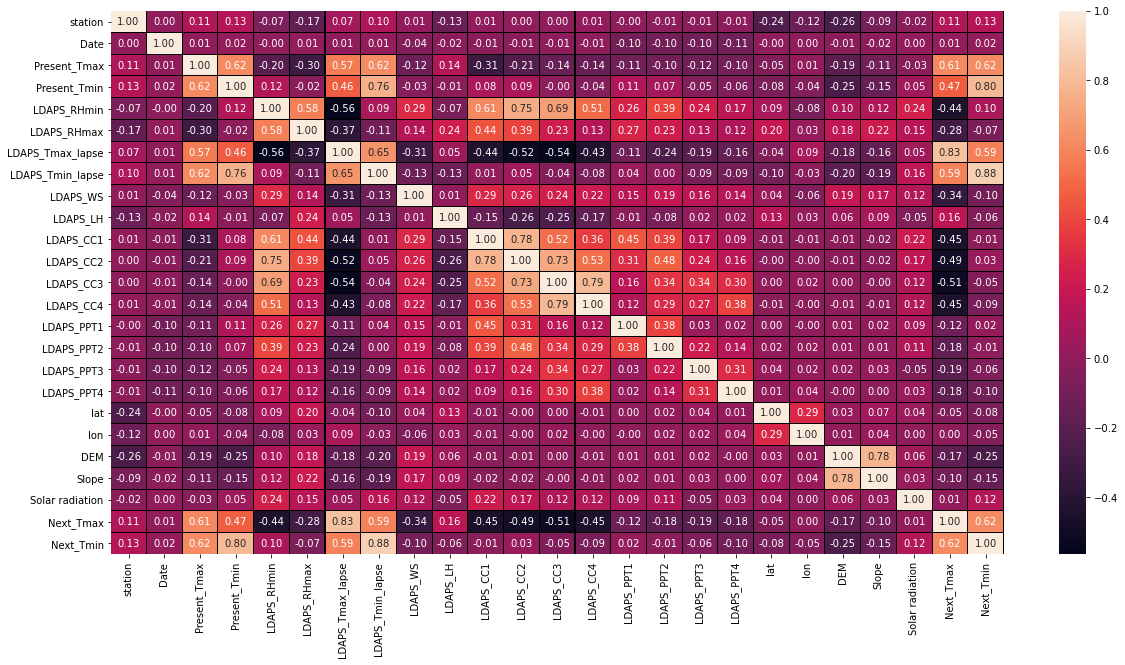

In [43]:
#Heatmap Display distribution of data across all level of category
plt.figure(figsize=(20,10))
sns.heatmap(dfcor,annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

# Removing Outliers from the Dataset

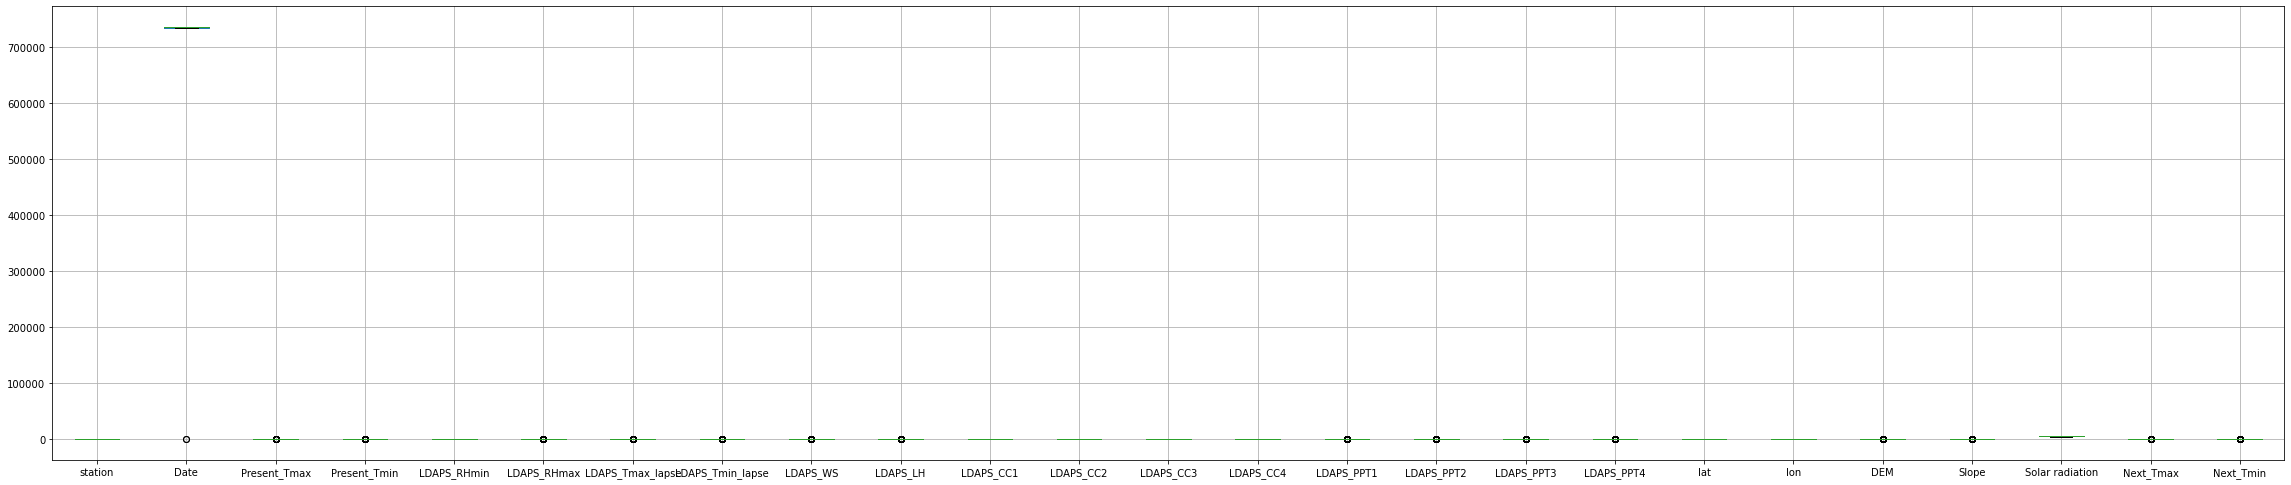

In [44]:
# Boxplot Display distribution of data across all level of category
df.boxplot(figsize=[40,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [45]:
from scipy.stats import zscore

In [46]:
z=np.abs(zscore(df))
z

array([[1.66431530e+00, 4.73283412e-02, 3.61325771e-01, ...,
        1.51793488e+00, 3.76282142e-01, 6.97599301e-01],
       [1.52562236e+00, 4.73283412e-02, 7.21084007e-01, ...,
        1.22994952e+00, 7.20972505e-02, 1.74063574e-01],
       [1.38692941e+00, 4.73283412e-02, 6.19608090e-01, ...,
        1.21653443e+00, 2.64259847e-01, 3.89744132e-01],
       ...,
       [1.66431530e+00, 8.13430765e-02, 2.22171758e+00, ...,
        2.07432510e+00, 7.92634435e-01, 2.22793450e+00],
       [0.00000000e+00, 6.21890289e+01, 3.30412736e+00, ...,
        2.35821196e+00, 4.12345278e+00, 4.68452522e+00],
       [0.00000000e+00, 6.21890289e+01, 2.64912642e+00, ...,
        1.51793488e+00, 2.76237361e+00, 2.76579089e+00]])

In [47]:
df_new=df[(z<3).all(axis=1)]
df_new.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [48]:
df.shape                                                # Check the shape of the dataset   

(7752, 25)

In [49]:
df_new.shape                                            # Check new shape of the dataset after removal of outliers

(6894, 25)

In [50]:
Data_loss=((1000-980)/1000*100)                         # Check data loss in dataset after removal of outliers
Data_loss

2.0

# To ckeck distribution of Skewness.

In [51]:
df.skew()                                                       # Check Skewness in dataset

station              0.000000
Date               -62.064166
Present_Tmax        -0.264137
Present_Tmin        -0.367538
LDAPS_RHmin          0.300220
LDAPS_RHmax         -0.855015
LDAPS_Tmax_lapse    -0.227880
LDAPS_Tmin_lapse    -0.581763
LDAPS_WS             1.579236
LDAPS_LH             0.673757
LDAPS_CC1            0.459458
LDAPS_CC2            0.472350
LDAPS_CC3            0.640735
LDAPS_CC4            0.666482
LDAPS_PPT1           5.393821
LDAPS_PPT2           5.775355
LDAPS_PPT3           6.457129
LDAPS_PPT4           6.825464
lat                  0.087062
lon                 -0.285213
DEM                  1.723257
Slope                1.563020
Solar radiation     -0.511210
Next_Tmax           -0.340200
Next_Tmin           -0.404447
dtype: float64

In [52]:
x= df.drop('Next_Tmax',axis=1)
y= df['Next_Tmax']

To handle Skewness using Power transform function.

In [53]:
from sklearn.preprocessing import power_transform
df_max=power_transform(x)

df_max=pd.DataFrame(df_max,columns=x.columns)

In [54]:
df_max.skew()

station             -0.204565
Date               -17.124736
Present_Tmax        -0.035006
Present_Tmin        -0.012048
LDAPS_RHmin         -0.017469
LDAPS_RHmax         -0.115143
LDAPS_Tmax_lapse    -0.009351
LDAPS_Tmin_lapse    -0.017827
LDAPS_WS             0.002408
LDAPS_LH             0.057403
LDAPS_CC1            0.046757
LDAPS_CC2            0.045326
LDAPS_CC3            0.087933
LDAPS_CC4            0.126895
LDAPS_PPT1           1.404189
LDAPS_PPT2           1.577808
LDAPS_PPT3           1.747820
LDAPS_PPT4           1.963848
lat                  0.000000
lon                 -0.198429
DEM                  0.039456
Slope                0.233968
Solar radiation     -0.176636
Next_Tmin           -0.013745
dtype: float64

In [55]:
x=df_max
x.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin
0,-1.860356,-1.0743,-0.408897,-0.797707,0.172680,0.272915,-0.556645,-0.312411,0.093387,0.310382,-0.412176,-0.506509,-0.541852,-0.584801,-0.570471,-0.532418,-0.505596,-0.458389,0.0,-0.027632,1.834978,1.314153,1.849430,-0.745293
1,-1.648385,-1.0743,0.705123,-0.720130,-0.241770,0.185831,0.043756,0.144368,-0.625565,-0.211695,-0.451258,-0.283702,-0.554289,-0.603593,-0.570471,-0.532418,-0.505596,-0.458389,0.0,0.497283,0.055979,-0.385336,1.400702,-0.240855
2,-1.454848,-1.0743,0.595692,-0.027674,-0.501459,-0.773454,0.127214,0.394571,-0.314874,-1.375126,-0.527382,-0.258127,-0.317480,-0.520112,-0.570471,-0.532418,-0.505596,-0.458389,0.0,0.836548,-0.364575,-0.949164,1.380650,0.342379
3,-1.273958,-1.0743,0.741829,0.014910,0.171612,1.316777,-0.006660,-0.174463,-0.656732,0.204179,-0.494077,-0.401828,-0.544825,-0.565449,-0.570471,-0.532418,-0.505596,-0.458389,0.0,0.368125,0.084879,1.235263,1.357783,0.516713
4,-1.102545,-1.0743,0.523313,-0.602237,0.031496,0.110968,-0.208627,-0.103881,-0.593836,1.300503,-0.814752,-0.291713,-0.448666,-0.365736,-0.570471,-0.532418,-0.505596,-0.458389,0.0,1.871193,-0.290442,-0.401730,1.366748,-0.240855


In [56]:
p= df.drop('Next_Tmin',axis=1)
q= df['Next_Tmin']

To handle Skewness using Power transform function.

In [57]:
from sklearn.preprocessing import power_transform
df_min=power_transform(p)

df_min=pd.DataFrame(df_min,columns=p.columns)

In [58]:
df_min.skew()

station             -0.204565
Date               -17.124736
Present_Tmax        -0.035006
Present_Tmin        -0.012048
LDAPS_RHmin         -0.017469
LDAPS_RHmax         -0.115143
LDAPS_Tmax_lapse    -0.009351
LDAPS_Tmin_lapse    -0.017827
LDAPS_WS             0.002408
LDAPS_LH             0.057403
LDAPS_CC1            0.046757
LDAPS_CC2            0.045326
LDAPS_CC3            0.087933
LDAPS_CC4            0.126895
LDAPS_PPT1           1.404189
LDAPS_PPT2           1.577808
LDAPS_PPT3           1.747820
LDAPS_PPT4           1.963848
lat                  0.000000
lon                 -0.198429
DEM                  0.039456
Slope                0.233968
Solar radiation     -0.176636
Next_Tmax           -0.038540
dtype: float64

In [59]:
p=df_max
p.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin
0,-1.860356,-1.0743,-0.408897,-0.797707,0.172680,0.272915,-0.556645,-0.312411,0.093387,0.310382,-0.412176,-0.506509,-0.541852,-0.584801,-0.570471,-0.532418,-0.505596,-0.458389,0.0,-0.027632,1.834978,1.314153,1.849430,-0.745293
1,-1.648385,-1.0743,0.705123,-0.720130,-0.241770,0.185831,0.043756,0.144368,-0.625565,-0.211695,-0.451258,-0.283702,-0.554289,-0.603593,-0.570471,-0.532418,-0.505596,-0.458389,0.0,0.497283,0.055979,-0.385336,1.400702,-0.240855
2,-1.454848,-1.0743,0.595692,-0.027674,-0.501459,-0.773454,0.127214,0.394571,-0.314874,-1.375126,-0.527382,-0.258127,-0.317480,-0.520112,-0.570471,-0.532418,-0.505596,-0.458389,0.0,0.836548,-0.364575,-0.949164,1.380650,0.342379
3,-1.273958,-1.0743,0.741829,0.014910,0.171612,1.316777,-0.006660,-0.174463,-0.656732,0.204179,-0.494077,-0.401828,-0.544825,-0.565449,-0.570471,-0.532418,-0.505596,-0.458389,0.0,0.368125,0.084879,1.235263,1.357783,0.516713
4,-1.102545,-1.0743,0.523313,-0.602237,0.031496,0.110968,-0.208627,-0.103881,-0.593836,1.300503,-0.814752,-0.291713,-0.448666,-0.365736,-0.570471,-0.532418,-0.505596,-0.458389,0.0,1.871193,-0.290442,-0.401730,1.366748,-0.240855


# Regression Method

# Linear Regression Model

Linear regression model for Next_Tmax

In [60]:
from sklearn.linear_model import LinearRegression
lr_max=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [61]:
for i in range(0,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=i)
    lr_max.fit(x_train,y_train)
    pred_train_max=lr_max.predict(x_train)
    pred_test_max=lr_max.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train_max)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test_max)}')
    print('\n')

At random state 0,the training accuracy is:0.7899318196746525
At random state 0,the testing accuracy is:0.7853128124018679


At random state 1,the training accuracy is:0.7900226018934187
At random state 1,the testing accuracy is:0.7843257687655286


At random state 2,the training accuracy is:0.7992918838964412
At random state 2,the testing accuracy is:0.7811742552087011


At random state 3,the training accuracy is:0.794555133539714
At random state 3,the testing accuracy is:0.7824459791208626


At random state 4,the training accuracy is:0.7895429917088475
At random state 4,the testing accuracy is:0.7848772764675505


At random state 5,the training accuracy is:0.7911399838785262
At random state 5,the testing accuracy is:0.7839913581406159


At random state 6,the training accuracy is:0.7912132076500196
At random state 6,the testing accuracy is:0.7839891890960186


At random state 7,the training accuracy is:0.7797239899884153
At random state 7,the testing accuracy is:0.7894828431271967


A

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=0)
lr_max.fit(x_train,y_train)

LinearRegression()

In [63]:
print(lr_max.intercept_)

30.233992912330052


In [64]:
coeff_df=pd.DataFrame(lr_max.coef_,x.columns,columns=['Co-efficient'])
coeff_df

,Co-efficient
station,1.637582e-01
Date,1.099630e-01
Present_Tmax,3.690553e-01
Present_Tmin,-6.717166e-02
LDAPS_RHmin,2.590079e-01
LDAPS_RHmax,-4.090147e-02
LDAPS_Tmax_lapse,1.742406e+00
LDAPS_Tmin_lapse,-5.764465e-01
LDAPS_WS,-3.524413e-01
LDAPS_LH,2.135701e-01


In [65]:
pred=lr_max.predict(x_test)

In [66]:
df=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df.head()

,Actual,Predicted
4271,31.9,27.869819
971,34.6,34.531147
7541,29.7,29.431319
4806,29.6,27.041395
2048,32.0,31.894202


In [67]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 1.1094290210717257
Mean squared error: 2.0895135485449905
Root mean squared error: 1.4455149769355524


In Linear Regressor model, The root mean squared error value is high so we should compare with more model.

In [68]:
predict_test=lr_max.predict(x_test)
print(r2_score(y_test,predict_test)*100)

78.53128124018679


In [69]:
predict_train=lr_max.predict(x_train)
print(r2_score(y_train,predict_train)*100)

78.99318196746525


Cross validation score for Linear Regression Model of Next_Tmax

In [70]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr_max,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.6948952502857471 and accuracy score for training is 0.7899318196746525 and accuracy score for testing is 0.7853128124018679


At cross fold(j) the cv score is 0.7129283489479924 and accuracy score for training is 0.7899318196746525 and accuracy score for testing is 0.7853128124018679


At cross fold(j) the cv score is 0.7157337050086392 and accuracy score for training is 0.7899318196746525 and accuracy score for testing is 0.7853128124018679


At cross fold(j) the cv score is 0.7078557623570365 and accuracy score for training is 0.7899318196746525 and accuracy score for testing is 0.7853128124018679


At cross fold(j) the cv score is 0.7087223765630384 and accuracy score for training is 0.7899318196746525 and accuracy score for testing is 0.7853128124018679


At cross fold(j) the cv score is 0.7087497196328892 and accuracy score for training is 0.7899318196746525 and accuracy score for testing is 0.7853128124018679


At cross fold(j) the cv score is 0

The Cross validation score of Next day temparature maximum for training & testing accuracy score is 78% & 78% respectively.

Lets plot with y_test vs prediction

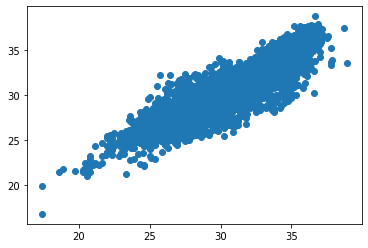

In [71]:
plt.scatter(x=y_test,y=predict_test)

Linear Regression Model for Next_Tmin

In [72]:
from sklearn.linear_model import LinearRegression
lr_min=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [73]:
for i in range(0,10):
    p_train,p_test,q_train,q_test=train_test_split(p,q,test_size=0.7,random_state=i)
    lr_min.fit(p_train,q_train)
    pred_train_min=lr_min.predict(p_train)
    pred_test_min=lr_min.predict(p_test)
    print(f'At random state {i},the training accuracy is:{r2_score(q_train,pred_train_min)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(q_test,pred_test_min)}')
    print('\n')

At random state 0,the training accuracy is:0.9926271626109531
At random state 0,the testing accuracy is:0.9917837206822862


At random state 1,the training accuracy is:0.993112754027566
At random state 1,the testing accuracy is:0.9913959436329016


At random state 2,the training accuracy is:0.9934105020007297
At random state 2,the testing accuracy is:0.9912819915922697


At random state 3,the training accuracy is:0.9921021988385028
At random state 3,the testing accuracy is:0.9919521319193425


At random state 4,the training accuracy is:0.9931986914187384
At random state 4,the testing accuracy is:0.9915057869627967


At random state 5,the training accuracy is:0.9929499887065881
At random state 5,the testing accuracy is:0.9916695428045792


At random state 6,the training accuracy is:0.992715043213458
At random state 6,the testing accuracy is:0.9917019312211905


At random state 7,the training accuracy is:0.9923859807896281
At random state 7,the testing accuracy is:0.9918356387589462


At

In [74]:
p_train,p_test,q_train,q_test=train_test_split(p,q,test_size=0.7,random_state=6)
lr_min.fit(p_train,q_train)

LinearRegression()

In [75]:
print(lr_min.intercept_)

22.927004045932588


In [76]:
coeff_df=pd.DataFrame(lr_min.coef_,p.columns,columns=['Co-efficient'])
coeff_df

,Co-efficient
station,-1.140468e-05
Date,-4.412942e-02
Present_Tmax,-4.596055e-03
Present_Tmin,2.220226e-02
LDAPS_RHmin,7.418634e-02
LDAPS_RHmax,2.141924e-02
LDAPS_Tmax_lapse,1.008510e-01
LDAPS_Tmin_lapse,-3.827201e-02
LDAPS_WS,-1.653425e-02
LDAPS_LH,-2.510248e-02


In [77]:
pred=lr_min.predict(p_test)

In [78]:
df=pd.DataFrame({'Actual':q_test,'Predicted':pred})
df.head()

,Actual,Predicted
1236,24.0,23.868357
981,27.6,28.048798
7695,18.8,18.689530
6012,26.5,26.558148
492,25.0,25.019606


In [79]:
print("error:")
print("Mean absolute error:",mean_absolute_error(q_test,pred))
print("Mean squared error:",mean_squared_error(q_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(q_test,pred)))

error:
Mean absolute error: 0.14808037718077036
Mean squared error: 0.05082059599529527
Root mean squared error: 0.22543423873780857


In Linear Regressor model, The root mean squared error value is high so we should compare with more model.

In [80]:
predict_test=lr_min.predict(p_test)
print(r2_score(q_test,predict_test)*100)

99.17019312211906


In [81]:
predict_train=lr_min.predict(p_train)
print(r2_score(q_train,predict_train)*100)

99.2715043213458


Cross Validation score for Linear Regression model of Next_Tmin

In [82]:
Train_accuracy=r2_score(q_train,predict_train)
Test_accuracy=r2_score(q_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr_min,p,q,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.9897647999544502 and accuracy score for training is 0.992715043213458 and accuracy score  for testing is 0.9917019312211905


At cross fold(j) the cv score is 0.9889262293325481 and accuracy score for training is 0.992715043213458 and accuracy score  for testing is 0.9917019312211905


At cross fold(j) the cv score is 0.9897904305136653 and accuracy score for training is 0.992715043213458 and accuracy score  for testing is 0.9917019312211905


At cross fold(j) the cv score is 0.9884916660616238 and accuracy score for training is 0.992715043213458 and accuracy score  for testing is 0.9917019312211905


At cross fold(j) the cv score is 0.988690967472227 and accuracy score for training is 0.992715043213458 and accuracy score  for testing is 0.9917019312211905


At cross fold(j) the cv score is 0.9899746193892842 and accuracy score for training is 0.992715043213458 and accuracy score  for testing is 0.9917019312211905


At cross fold(j) the cv score is 0.

The Cross validation score of Next day temparature minimum for training & testing accuracy score is 99% & 99% respectively.

Lets plot with q_test vs prediction

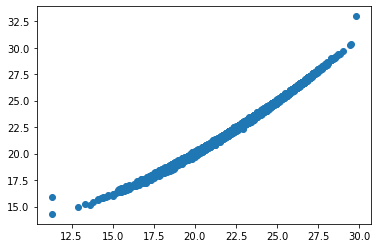

In [83]:
plt.scatter(x=q_test,y=predict_test)

# Decision Tree Regressor Model

Decision Tree Regressor Model for Next_Tmax

In [84]:
from sklearn.tree import DecisionTreeRegressor
dtr_max=DecisionTreeRegressor()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [85]:
for i in range(0,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=i)
    dtr_max.fit(x_train,y_train)
    pred_train_max=dtr_max.predict(x_train)
    pred_test_max=dtr_max.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train_max)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test_max)}')
    print('\n')

At random state 0,the training accuracy is:1.0
At random state 0,the testing accuracy is:0.7444068694149595


At random state 1,the training accuracy is:1.0
At random state 1,the testing accuracy is:0.7406456325675632


At random state 2,the training accuracy is:1.0
At random state 2,the testing accuracy is:0.7372511401550293


At random state 3,the training accuracy is:1.0
At random state 3,the testing accuracy is:0.7216543873810386


At random state 4,the training accuracy is:1.0
At random state 4,the testing accuracy is:0.7203757328444258


At random state 5,the training accuracy is:1.0
At random state 5,the testing accuracy is:0.7246040877819568


At random state 6,the training accuracy is:1.0
At random state 6,the testing accuracy is:0.7343045523116392


At random state 7,the training accuracy is:1.0
At random state 7,the testing accuracy is:0.7107844890940832


At random state 8,the training accuracy is:1.0
At random state 8,the testing accuracy is:0.7114544402551127


At random 

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=1)
dtr_max.fit(x_train,y_train)

DecisionTreeRegressor()

In [87]:
pred=dtr_max.predict(x_test)

In [88]:
df=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df.head()

,Actual,Predicted
6430,27.1,25.7
863,32.2,31.9
7001,33.1,34.0
5781,34.6,34.7
6977,33.3,33.3


In [89]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 1.1391421890905058
Mean squared error: 2.4679998066693196
Root mean squared error: 1.5709868894008376


In Decision Tree Regressor model, The Root mean squared error value is slightly lower when compare with linear regressor model.but still we should compare with more model.

In [90]:
predict_test=dtr_max.predict(x_test)
print(r2_score(y_test,predict_test)*100)

74.34349767445995


In [91]:
predict_train=dtr_max.predict(x_train)
print(r2_score(y_train,predict_train)*100)

100.0


Cross validation score of Next_Tmax

In [92]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(dtr_max,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.4076844264126214 and accuracy score for training is 1.0 and accuracy score for testing is 0.7434349767445996


At cross fold(j) the cv score is 0.45741272804378647 and accuracy score for training is 1.0 and accuracy score for testing is 0.7434349767445996


At cross fold(j) the cv score is 0.4034723086098203 and accuracy score for training is 1.0 and accuracy score for testing is 0.7434349767445996


At cross fold(j) the cv score is 0.3871576838945228 and accuracy score for training is 1.0 and accuracy score for testing is 0.7434349767445996


At cross fold(j) the cv score is 0.4420133449979498 and accuracy score for training is 1.0 and accuracy score for testing is 0.7434349767445996


At cross fold(j) the cv score is 0.42866201753182087 and accuracy score for training is 1.0 and accuracy score for testing is 0.7434349767445996


At cross fold(j) the cv score is 0.3720073153093293 and accuracy score for training is 1.0 and accuracy score for testing 

The Cross validation score of Next day temparature maximum for training & testing accuracy score is 100% & 73% respectively.

Lets plot with y_test vs prediction

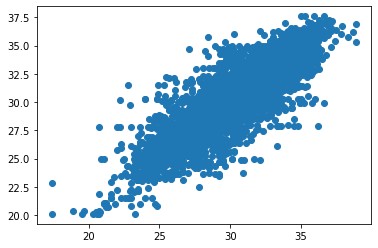

In [93]:
plt.scatter(x=y_test,y=predict_test)

Decision Tree Regressor model for Next_Tmin

In [94]:
from sklearn.tree import DecisionTreeRegressor
dtr_min=DecisionTreeRegressor()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [95]:
for i in range(0,10):
    p_train,p_test,q_train,q_test=train_test_split(p,q,test_size=0.7,random_state=i)
    dtr_min.fit(p_train,q_train)
    pred_train_min=dtr_min.predict(p_train)
    pred_test_min=dtr_min.predict(p_test)
    print(f'At random state {i},the training accuracy is:{r2_score(q_train,pred_train_min)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(q_test,pred_test_min)}')
    print('\n')

At random state 0,the training accuracy is:1.0
At random state 0,the testing accuracy is:0.9973939362330492


At random state 1,the training accuracy is:1.0
At random state 1,the testing accuracy is:0.9992351374461778


At random state 2,the training accuracy is:1.0
At random state 2,the testing accuracy is:0.9989191203615819


At random state 3,the training accuracy is:1.0
At random state 3,the testing accuracy is:0.9998342473724038


At random state 4,the training accuracy is:1.0
At random state 4,the testing accuracy is:0.9984116148998645


At random state 5,the training accuracy is:1.0
At random state 5,the testing accuracy is:0.9992185510354206


At random state 6,the training accuracy is:1.0
At random state 6,the testing accuracy is:0.999428348884047


At random state 7,the training accuracy is:1.0
At random state 7,the testing accuracy is:0.9989036140484493


At random state 8,the training accuracy is:1.0
At random state 8,the testing accuracy is:0.999666284664669


At random st

In [96]:
p_train,p_test,q_train,q_test=train_test_split(p,q,test_size=0.7,random_state=2)
dtr_min.fit(p_train,q_train)

DecisionTreeRegressor()

In [97]:
pred=dtr_min.predict(p_test)

In [98]:
df=pd.DataFrame({'Actual':q_test,'Predicted':pred})
df.head()

,Actual,Predicted
6867,24.4,24.4
5157,25.2,25.2
6851,23.4,23.4
4553,18.9,18.9
727,23.6,23.6


In [99]:
print("error:")
print("Mean absolute error:",mean_absolute_error(q_test,pred))
print("Mean squared error:",mean_squared_error(q_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(q_test,pred)))

error:
Mean absolute error: 0.005620047908610065
Mean squared error: 0.00525336281555187
Root mean squared error: 0.07248008564807212


In Decision Tree Regressor model, The Root mean squared error value is slightly better when compare with linear regressor model but still we should compare with more model.

In [100]:
predict_test=dtr_min.predict(p_test)
print(r2_score(q_test,predict_test)*100)

99.9158036106795


In [101]:
predict_train=dtr_min.predict(p_train)
print(r2_score(q_train,predict_train)*100)

100.0


The Cross validation score for Next_Tmin

In [102]:
Train_accuracy=r2_score(q_train,predict_train)
Test_accuracy=r2_score(q_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(dtr_min,p,q,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.9994290791324045 and accuracy score for training is 1.0 and accuracy score for testing 0.9991580361067951


At cross fold(j) the cv score is 0.9994849445082662 and accuracy score for training is 1.0 and accuracy score for testing 0.9991580361067951


At cross fold(j) the cv score is 0.9996400024270508 and accuracy score for training is 1.0 and accuracy score for testing 0.9991580361067951


At cross fold(j) the cv score is 0.9992700546933344 and accuracy score for training is 1.0 and accuracy score for testing 0.9991580361067951


At cross fold(j) the cv score is 0.9998257352440777 and accuracy score for training is 1.0 and accuracy score for testing 0.9991580361067951


At cross fold(j) the cv score is 0.9998202956885216 and accuracy score for training is 1.0 and accuracy score for testing 0.9991580361067951


At cross fold(j) the cv score is 0.9995328330522137 and accuracy score for training is 1.0 and accuracy score for testing 0.9991580361067951



The Cross validation score of Next day temparature minimum for training & testing accuracy score is 100% & 99% respectively.

Lets plot with q_test vs prediction

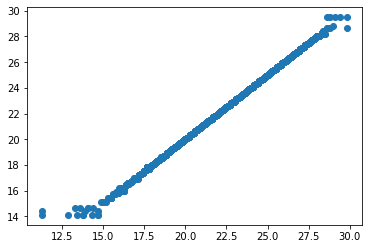

In [103]:
plt.scatter(x=q_test,y=predict_test)

# Random Forest Regressor Model

Random Forest Regressor model for T_max

In [104]:
from sklearn.ensemble import RandomForestRegressor
rdr_max=RandomForestRegressor()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [105]:
for i in range(0,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=i)
    rdr_max.fit(x_train,y_train)
    pred_train_max=rdr_max.predict(x_train)
    pred_test_max=rdr_max.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train_max)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test_max)}')
    print('\n')

At random state 0,the training accuracy is:0.9819384966870498
At random state 0,the testing accuracy is:0.8784687454103856


At random state 1,the training accuracy is:0.9826758340234115
At random state 1,the testing accuracy is:0.8775154749739135


At random state 2,the training accuracy is:0.9840795782276234
At random state 2,the testing accuracy is:0.8747820682305991


At random state 3,the training accuracy is:0.9830548881882339
At random state 3,the testing accuracy is:0.8775293108425716


At random state 4,the training accuracy is:0.9827071916622125
At random state 4,the testing accuracy is:0.8750487309588506


At random state 5,the training accuracy is:0.9825010929233033
At random state 5,the testing accuracy is:0.8778827891880767


At random state 6,the training accuracy is:0.9832806428659464
At random state 6,the testing accuracy is:0.875503985586933


At random state 7,the training accuracy is:0.9823846839036654
At random state 7,the testing accuracy is:0.8744501414949195


A

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=9)
rdr_max.fit(x_train,y_train)

RandomForestRegressor()

In [107]:
pred=rdr_max.predict(x_test)

In [108]:
df=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df.head()

,Actual,Predicted
978,32.7,33.257498
5144,32.7,31.958000
4818,29.5,28.550000
4433,31.5,31.862000
5714,35.3,35.626000


In [109]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 0.8213980464452275
Mean squared error: 1.163006962023605
Root mean squared error: 1.0784280050256507


In Random Forest Regressor model, The root mean squared error value is low when comapred with Decision tree regressor.so this is our best model.

In [110]:
predict_test=rdr_max.predict(x_test)
print(r2_score(y_test,predict_test)*100)

88.07216958136675


In [111]:
predict_train=rdr_max.predict(x_train)
print(r2_score(y_train,predict_train)*100)

98.12053969415244


The Cross validation Score for Next_Tmax

In [112]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rdr_max,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.6259516242301032 and accuracy score for training is 0.9812053969415244 and accuracy score for testing is 0.8807216958136675


At cross fold(j) the cv score is 0.7056950665641963 and accuracy score for training is 0.9812053969415244 and accuracy score for testing is 0.8807216958136675


At cross fold(j) the cv score is 0.6850042190627974 and accuracy score for training is 0.9812053969415244 and accuracy score for testing is 0.8807216958136675


At cross fold(j) the cv score is 0.6561022211224606 and accuracy score for training is 0.9812053969415244 and accuracy score for testing is 0.8807216958136675


At cross fold(j) the cv score is 0.687019649785234 and accuracy score for training is 0.9812053969415244 and accuracy score for testing is 0.8807216958136675


At cross fold(j) the cv score is 0.6914576643780123 and accuracy score for training is 0.9812053969415244 and accuracy score for testing is 0.8807216958136675


At cross fold(j) the cv score is 0.

The Cross validation score of Next day temparature maximum for training & testing accuracy score is 98% & 88% respectively.

Lets plot with y_test vs prediction

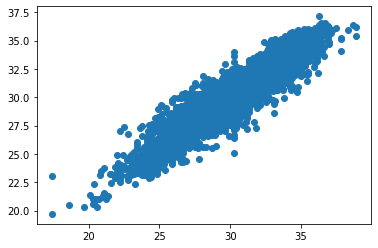

In [113]:
plt.scatter(x=y_test,y=predict_test)

<AxesSubplot:xlabel='Next_Tmax', ylabel='Density'>

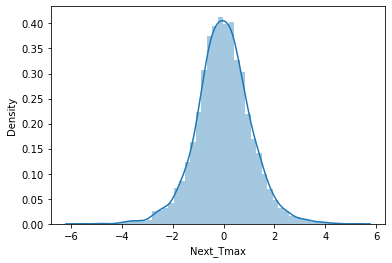

In [114]:
sns.distplot((y_test-predict_test),bins=50)

Notice here that our residuals looked to be normally distributed and that's really a good sign which means that our model was a correct choice for the data.

Random Forest Regressor model for Next_tmin

In [115]:
from sklearn.ensemble import RandomForestRegressor
rdr_min=RandomForestRegressor()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [116]:
for i in range(0,10):
    p_train,p_test,q_train,q_test=train_test_split(p,q,test_size=0.7,random_state=i)
    rdr_min.fit(p_train,q_train)
    pred_train_min=rdr_min.predict(p_train)
    pred_test_min=rdr_min.predict(p_test)
    print(f'At random state {i},the training accuracy is:{r2_score(q_train,pred_train_min)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(q_test,pred_test_min)}')
    print('\n')

At random state 0,the training accuracy is:0.9998746623517846
At random state 0,the testing accuracy is:0.9997188778466691


At random state 1,the training accuracy is:0.9999822734154935
At random state 1,the testing accuracy is:0.9993105856868214


At random state 2,the training accuracy is:0.9999741535014564
At random state 2,the testing accuracy is:0.9988772215233684


At random state 3,the training accuracy is:0.9998996588051098
At random state 3,the testing accuracy is:0.9997684201234924


At random state 4,the training accuracy is:0.9999660837938655
At random state 4,the testing accuracy is:0.9988129690746056


At random state 5,the training accuracy is:0.9999686886454195
At random state 5,the testing accuracy is:0.9994030517540785


At random state 6,the training accuracy is:0.9999631031158612
At random state 6,the testing accuracy is:0.9994697012197261


At random state 7,the training accuracy is:0.999904474142592
At random state 7,the testing accuracy is:0.9997123062424951


A

In [117]:
p_train,p_test,q_train,q_test=train_test_split(p,q,test_size=0.7,random_state=3)
rdr_min.fit(p_train,q_train)

RandomForestRegressor()

In [118]:
pred=rdr_min.predict(p_test)

In [119]:
df=pd.DataFrame({'Actual':q_test,'Predicted':pred})
df.head()

,Actual,Predicted
3473,23.9,23.9
4556,20.8,20.8
5860,25.2,25.2
6274,22.6,22.6
2410,24.2,24.2


In [120]:
print("error:")
print("Mean absolute error:",mean_absolute_error(q_test,pred))
print("Mean squared error:",mean_squared_error(q_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(q_test,pred)))

error:
Mean absolute error: 0.0033509169960057985
Mean squared error: 0.0012223725524320868
Root mean squared error: 0.034962444886364664


In Random Forest Regressor model, The root mean squared error value is low when comapred with other models.so this is our best model.

In [121]:
predict_test=rdr_min.predict(p_test)
print(r2_score(q_test,predict_test)*100)

99.98015212262078


In [122]:
predict_train=rdr_min.predict(p_train)
print(r2_score(q_train,predict_train)*100)

99.99320012604348


Cross validation score for Tmin.

In [123]:
Train_accuracy=r2_score(q_train,predict_train)
Test_accuracy=r2_score(q_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rdr_min,p,q,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is{Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.9993172285407753 and accuracy score for training is 0.9999320012604348 and accuracy score for testing is0.9998015212262078


At cross fold(j) the cv score is 0.9993850633985938 and accuracy score for training is 0.9999320012604348 and accuracy score for testing is0.9998015212262078


At cross fold(j) the cv score is 0.9994730939129562 and accuracy score for training is 0.9999320012604348 and accuracy score for testing is0.9998015212262078


At cross fold(j) the cv score is 0.9997924745448665 and accuracy score for training is 0.9999320012604348 and accuracy score for testing is0.9998015212262078


At cross fold(j) the cv score is 0.9997844038459184 and accuracy score for training is 0.9999320012604348 and accuracy score for testing is0.9998015212262078


At cross fold(j) the cv score is 0.9998089189422986 and accuracy score for training is 0.9999320012604348 and accuracy score for testing is0.9998015212262078


At cross fold(j) the cv score is 0.99980

The Cross validation score of Next day temparature minimum for training & testing accuracy score is 98% & 99% respectively.

Lets plot with q_test vs prediction

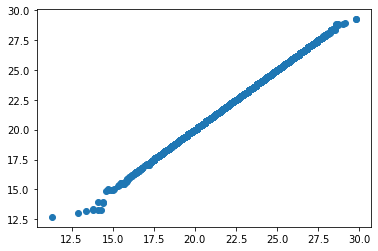

In [124]:
plt.scatter(x=q_test,y=predict_test)

<AxesSubplot:xlabel='Next_Tmin', ylabel='Density'>

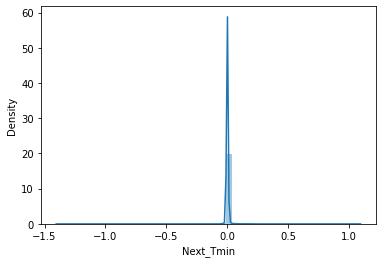

In [125]:
sns.distplot((q_test-predict_test))

Notice here that our residuals looked to be normally distributed and that's really a good sign which means that our model was a correct choice for the data.

# Hyper Parameter Tuning

Hyper Parameter Tuning for Linear Regression of Tmax

In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,0.1,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [127]:
ls=Lasso(alpha=0.001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_decision=ls.predict(x_test)
lss=r2_score(y_test,pred_decision)
print('R2 Score:',lss*100)
lsscore=cross_val_score(ls,x,y,cv=5)
lsc=lsscore.mean()
print('Cross Val Score:',lsc*100)

R2 Score: 78.98104590011611
Cross Val Score: 70.80747078695148


Hyper Parameter Tuning for Linear Regression of Tmin

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,0.1,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(p_train,q_train)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [129]:
ls=Lasso(alpha=0.001,random_state=0)
ls.fit(p_train,q_train)
ls.score(p_train,q_train)
pred_decision=ls.predict(p_test)
lss=r2_score(q_test,pred_decision)
print('R2 Score:',lss*100)
lsscore=cross_val_score(ls,x,y,cv=5)
lsc=lsscore.mean()
print('Cross Val Score:',lsc*100)

R2 Score: 99.2003196297636
Cross Val Score: 70.80747078695148


Hyper Parameter Tuning for Decision Tree Regressor of Tmax

In [130]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': np.arange(2, 15),'random_state':list(range(0,10))}
GCV=GridSearchCV(DecisionTreeRegressor(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [131]:
GCV.best_params_

{'max_depth': 8, 'random_state': 2}

In [132]:
dtr=DecisionTreeRegressor(max_depth=8,random_state=2)

dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
pred_decision=dtr.predict(x_test)
dtrs=r2_score(y_test,pred_decision)
print('R2 Score:',dtrs*100)
dtrscore=cross_val_score(dtr,x,y,cv=5)
dtrc=dtrscore.mean()
print('Cross Val Score:',dtrc*100)

R2 Score: 77.47356956351972
Cross Val Score: 50.50544655503779


Hyper Parameter Tuning for Decision Tree Regressor of Tmin

In [133]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': np.arange(2, 15),'random_state':list(range(0,10))}
GCV=GridSearchCV(DecisionTreeRegressor(),parameters,cv=5)
GCV.fit(p_train,q_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [134]:
GCV.best_params_

{'max_depth': 9, 'random_state': 2}

In [135]:
dtr=DecisionTreeRegressor(max_depth=9,random_state=2)

dtr.fit(p_train,q_train)
dtr.score(p_train,q_train)
pred_decision=dtr.predict(p_test)
dtrs=r2_score(q_test,pred_decision)
print('R2 Score:',dtrs*100)
dtrscore=cross_val_score(dtr,x,y,cv=5)
dtrc=dtrscore.mean()
print('Cross Val Score:',dtrc*100)

R2 Score: 99.98133038996029
Cross Val Score: 50.79093071517345


Hyper Parameter Tuning for Random Forest Regressor of Tmax

In [136]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2'],'random_state':list(range(0,10))}
rdr=RandomForestRegressor()
clf=GridSearchCV(rdr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt', 'random_state': 1}


In [137]:
rdr=RandomForestRegressor(criterion='mse',max_features='sqrt',random_state=1)
rdr.fit(x_train,y_train)
rdr.score(x_train,y_train)
pred_decision=rdr.predict(x_test)
rdrs=r2_score(y_test,pred_decision)
print('R2 Score:',rdrs*100)
rdrscore=cross_val_score(rdr,x,y,cv=5)
rdrc=rdrscore.mean()
print('Cross Val Score:',rdrc*100)

R2 Score: 88.54476210060305
Cross Val Score: 69.22430927033604


Hyper Parameter Tuning for Random Forest Regressor of Tmin

In [138]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2'],'random_state':list(range(0,10))}
rdr=RandomForestRegressor()
clf=GridSearchCV(rdr,parameters)
clf.fit(p_train,q_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto', 'random_state': 5}


In [139]:
rdr=RandomForestRegressor(criterion='mse',max_features='auto',random_state=5)
rdr.fit(p_train,q_train)
rdr.score(p_train,q_train)
pred_decision=rdr.predict(p_test)
rdrs=r2_score(q_test,pred_decision)
print('R2 Score:',rdrs*100)
rdrscore=cross_val_score(rdr,x,y,cv=5)
rdrc=rdrscore.mean()
print('Cross Val Score:',rdrc*100)

R2 Score: 99.97628148924626
Cross Val Score: 66.68563056586258


Compare with Actual Final Vs Sample Prediction for Tmax

,Y Test,Prediction
978,32.7,23.9
5144,32.7,20.8
4818,29.5,25.2
4433,31.5,22.6
5714,35.3,24.2


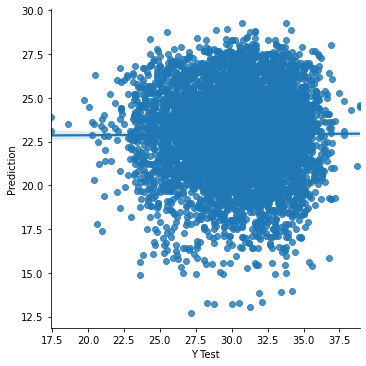

In [140]:
data=pd.DataFrame({'Y Test':y_test , 'Prediction':predict_test},columns=['Y Test','Prediction'])
sns.lmplot(x='Y Test',y='Prediction',data=data,palette='rainbow')
data.head()

Compare with Actual Final Vs Sample Prediction for Tmin

,Q Test,Prediction
3473,23.9,23.9
4556,20.8,20.8
5860,25.2,25.2
6274,22.6,22.6
2410,24.2,24.2


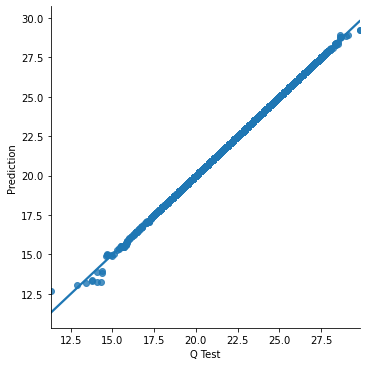

In [141]:
data=pd.DataFrame({'Q Test':q_test , 'Prediction':predict_test},columns=['Q Test','Prediction'])
sns.lmplot(x='Q Test',y='Prediction',data=data,palette='rainbow')
data.head()

# for Next Day Maximum Teparature (Next_Tmax)

# Model Saving

In [142]:
import pickle
filename='Temperature Forecast Project using ML.pkl'
pickle.dump(rdr_max, open(filename, 'wb'))

# Conclusion

In [143]:
loaded_model = pickle.load(open('Temperature Forecast Project using ML.pkl', 'rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

88.07216958136675


In [144]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,...,4677,4678,4679,4680,4681,4682,4683,4684,4685,4686,4687,4688,4689,4690,4691,4692,4693,4694,4695,4696,4697,4698,4699,4700,4701,4702,4703,4704,4705,4706,4707,4708,4709,4710,4711,4712,4713,4714,4715,4716,4717,4718,4719,4720,4721,4722,4723,4724,4725,4726,4727,4728,4729,4730,4731,4732,4733,4734,4735,4736,4737,4738,4739,4740,4741,4742,4743,4744,4745,4746,4747,4748,4749,4750,4751,4752,4753,4754,4755,4756,4757,4758,4759,4760,4761,4762,4763,4764,4765,4766,4767,4768,4769,4770,4771,4772,4773,4774,4775,4776,4777,4778,4779,4780,4781,4782,4783,4784,4785,4786,4787,4788,4789,4790,4791,4792,4793,4794,4795,4796,4797,4798,4799,4800,4801,4802,4803,4804,4805,4806,4807,4808,4809,4810,4811,4812,4813,4814,4815,4816,4817,4818,4819,4820,4821,4822,4823,4824,4825,4826,4827,4828,4829,4830,4831,4832,4833,4834,4835,4836,4837,4838,4839,4840,4841,4842,4843,4844,4845,4846,4847,4848,4849,4850,4851,4852,4853,4854,4855,4856,4857,4858,4859,4860,4861,4862,4863,4864,4865,4866,4867,4868,4869,4870,4871,4872,4873,4874,4875,4876,4877,4878,4879,4880,4881,4882,4883,4884,4885,4886,4887,4888,4889,4890,4891,4892,4893,4894,4895,4896,4897,

# For Next day Minimum Temparature(Next_Tmin)

# Model Saving

In [145]:
import pickle
filename='Temperature Forecast Project using ML.pkl'
pickle.dump(rdr_min, open(filename, 'wb'))

In [146]:
loaded_model = pickle.load(open('Temperature Forecast Project using ML.pkl', 'rb'))
result = loaded_model.score(p_test,q_test)
print(result*100)

99.98015212262078


# Conclusion

In [147]:
conclusion=pd.DataFrame([loaded_model.predict(p_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,...,4677,4678,4679,4680,4681,4682,4683,4684,4685,4686,4687,4688,4689,4690,4691,4692,4693,4694,4695,4696,4697,4698,4699,4700,4701,4702,4703,4704,4705,4706,4707,4708,4709,4710,4711,4712,4713,4714,4715,4716,4717,4718,4719,4720,4721,4722,4723,4724,4725,4726,4727,4728,4729,4730,4731,4732,4733,4734,4735,4736,4737,4738,4739,4740,4741,4742,4743,4744,4745,4746,4747,4748,4749,4750,4751,4752,4753,4754,4755,4756,4757,4758,4759,4760,4761,4762,4763,4764,4765,4766,4767,4768,4769,4770,4771,4772,4773,4774,4775,4776,4777,4778,4779,4780,4781,4782,4783,4784,4785,4786,4787,4788,4789,4790,4791,4792,4793,4794,4795,4796,4797,4798,4799,4800,4801,4802,4803,4804,4805,4806,4807,4808,4809,4810,4811,4812,4813,4814,4815,4816,4817,4818,4819,4820,4821,4822,4823,4824,4825,4826,4827,4828,4829,4830,4831,4832,4833,4834,4835,4836,4837,4838,4839,4840,4841,4842,4843,4844,4845,4846,4847,4848,4849,4850,4851,4852,4853,4854,4855,4856,4857,4858,4859,4860,4861,4862,4863,4864,4865,4866,4867,4868,4869,4870,4871,4872,4873,4874,4875,4876,4877,4878,4879,4880,4881,4882,4883,4884,4885,4886,4887,4888,4889,4890,4891,4892,4893,4894,4895,4896,4897,